In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sbs
import scipy.optimize as op

%% Machine Learning Online Class - Exercise 2: Logistic Regression
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the logistic
%  regression exercise. You will need to complete the following functions 
%  in this exericse:
%
%     sigmoid.m
%     costFunction.m
%     predict.m
%     costFunctionReg.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Load Data
%  The first two columns contains the exam scores and the third column
%  contains the label.


In [2]:
fname='ex2data1.txt';
#dtype = np.dtype([('X', 'f8'), ('y', 'f8')])
df = pd.read_csv(fname,delimiter=',',header=None)
df.columns = ['exam1', 'exam2','admitted']
data=np.asmatrix(df)
X = np.matrix(data[:, 0:2]); 
y = np.matrix(data[:, 2]);
[m, n] = X.shape;

%% ==================== Part 1: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.

['Plotting data with + indicating (y = 1) examples and o  indicating (y = 0) examples.\n']


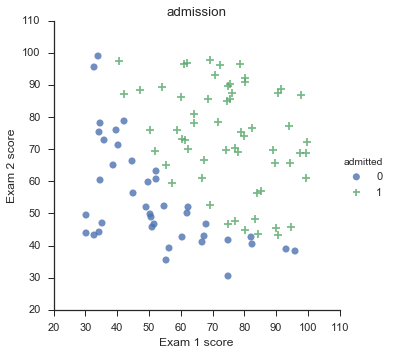

In [3]:
print(['Plotting data with + indicating (y = 1) examples and o  indicating (y = 0) examples.\n']);
sbs.set_context("notebook", font_scale=1.1)
sbs.set_style("ticks")
sbs.lmplot('exam1', 'exam2',
           data=df,
           fit_reg=False,
           hue="admitted",  
        markers=["o", "+"],
          scatter_kws={"marker": "D",
                        "s":50})
plt.title('admission')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')


%% ============ Part 2: Compute Cost and Gradient ============
%  In this part of the exercise, you will implement the cost and gradient
%  for logistic regression. You neeed to complete the code in 
%  costFunction.m

In [374]:
def sigmoid(z):
    #%SIGMOID Compute sigmoid function
    #%g = SIGMOID(z) computes the sigmoid of z.

    #% You need to return the following variables correctly 
    g = np.matrix(np.zeros(np.shape(z)));

#% ====================== YOUR CODE HERE ======================
#% Instructions: Compute the sigmoid of each value of z (z can be a matrix,vector or scalar).
    g = np.divide(1,(1+np.exp(-z)));    
    return g

In [375]:
def costFunction(theta, X, y):
#%COSTFUNCTION Compute cost and gradient for logistic regression
#%   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
#%   parameter for logistic regression and the gradient of the cost
#%   w.r.t. to the parameters.

#% Initialize some useful values
    m = len(y); #% number of training examples

#% You need to return the following variables correctly 
    J = 0;
    

#% ====================== YOUR CODE HERE ======================
#% Instructions: Compute the cost of a particular choice of theta.
#%               You should set J to the cost.
#%               Compute the partial derivatives and set grad to the partial
#%               derivatives of the cost w.r.t. each parameter in theta
#%
#% Note: grad should have the same dimensions as theta
    if len(np.shape(theta))==1:
        theta = np.transpose(np.matrix(theta));  
    grad = np.zeros(np.shape(theta));
    H=sigmoid(X*theta);
    J = np.sum(np.multiply(-y,np.log(H))-np.multiply((1-y),np.log(1-H)))/m;
    grad=np.transpose(X)*(H-y)/m;
    #grad=1
    return J,grad;
#%theta_temp = initial_theta-grad;
#% theta = theta_temp;

In [376]:
#%  Setup the data matrix appropriately, and add ones for the intercept term
#% Add intercept term to x and X_test
X = np.c_[np.ones(m), data[:,0:2]];

#% Initialize fitting parameters
initial_theta = np.matrix(np.zeros((n + 1, 1)));

#% Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y);

print('Cost at initial theta (zeros): %f'% cost);
print('Expected cost (approx): 0.693');
print('Gradient at initial theta (zeros): ');
for i in range(len(grad)): print 'grad=%.4f  ' %(grad[i])
#print(' %f \n' % grad);
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
grad=-0.1000  
grad=-12.0092  
grad=-11.2628  
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [377]:
test_theta = np.transpose(np.matrix([-24,0.2,0.2]));
cost, grad = costFunction(test_theta, X, y);
print('\nCost at test theta: %f'%cost);
print('Expected cost (approx): 0.218');
print('Gradient at test theta: ');
for i in range(len(grad)): print 'grad=%.4f  ' %(grad[i])
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');



Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
grad=0.0429  
grad=2.5662  
grad=2.6468  
Expected gradients (approx):
 0.043
 2.566
 2.647



%% ============= Part 3: Optimizing using fminunc  =============
%  In this exercise, you will use a built-in function (fminunc) to find the
%  optimal parameters theta.

In [378]:
#%  Set options for fminunc
#options = optimset('GradObj', 'on', 'MaxIter', 400);
#%  Run fminunc to obtain the optimal theta
#%  This function will return theta and the cost 
Result = op.minimize(fun = costFunction, 
                    x0 = initial_theta, 
                    args = (X, y),
                    method = 'TNC',
                    jac = True);
optimal_theta = Result.x;
cost, grad = costFunction(optimal_theta, X, y);

#% Print theta to screen
print('Cost at theta found by fminunc: %f', cost);
print('Expected cost (approx): 0.203');
print('theta: ');
for i in range(len(optimal_theta)): print 'grad=%.4f  ' %(optimal_theta[i])
print('Expected theta (approx):');
print(' -25.161\n 0.206\n 0.201\n');



('Cost at theta found by fminunc: %f', 0.20349770158947444)
Expected cost (approx): 0.203
theta: 
grad=-25.1613  
grad=0.2062  
grad=0.2015  
Expected theta (approx):
 -25.161
 0.206
 0.201



function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

m

In [379]:
def plotDecisionBoundary(theta, X, y):
    m,n=X.shape    
    if n <= 3:
        #% Only need 2 points to define a line, so choose two endpoints
        plot_x = (np.min(X[:,2])-2,  np.max(X[:,2])+2);
        #% Calculate the decision boundary line
        plot_y = np.multiply(np.divide(-1,theta[2]),np.multiply(theta[1],plot_x) + theta[0]);

    #% Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y,lw=2);
        plt.axis([30, 100, 30, 100])
    
    #% Legend, specific for the exercise
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,['Admitted', 'Not admitted', 'Decision Boundary'])
        
        
    else:
        #% Here is the grid range
        u = np.linspace(-1, 1.5, 50);
        v = np.linspace(-1, 1.5, 50);
        u_surf,v_surf=np.meshgrid(u,v);
        z = np.zeros((len(u),len(v)));
        #% Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = mapFeatures(np.matrix([u[i],v[j]]))*theta;
        return u,v,z


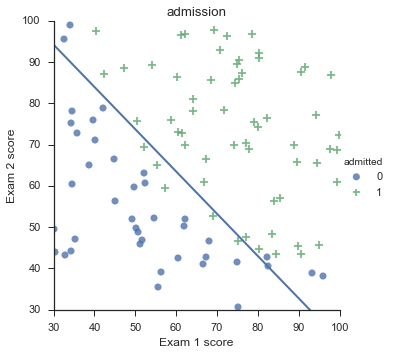

In [380]:
#% Plot Boundary
sbs.set_context("notebook", font_scale=1.1)
sbs.set_style("ticks")
sbs.lmplot('exam1', 'exam2',
           data=df,
           fit_reg=False,
           hue="admitted",  
        markers=["o", "+"],
          scatter_kws={"marker": "D",
                        "s":50})
plt.title('admission')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.hold(True)
plotDecisionBoundary(optimal_theta, X, y);

%% ============== Part 4: Predict and Accuracies ==============
%  After learning the parameters, you'll like to use it to predict the outcomes
%  on unseen data. In this part, you will use the logistic regression model
%  to predict the probability that a student with score 45 on exam 1 and 
%  score 85 on exam 2 will be admitted.
%
%  Furthermore, you will compute the training and test set accuracies of 
%  our model.
%
%  Your task is to complete the code in predict.m

%  Predict probability for a student with score 45 on exam 1 
%  and score 85 on exam 2 


In [389]:
def predict(theta, X):
    #%PREDICT Predict whether the label is 0 or 1 using learned logistic 
    #%regression parameters theta
    #%   p = PREDICT(theta, X) computes the predictions for X using a 
    #%   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

    m,n = X.shape; #% Number of training examples

    #% You need to return the following variables correctly
    p = np.zeros((m, 1));

    #% ====================== YOUR CODE HERE ======================
    #% Instructions: Complete the following code to make predictions using
    #%               your learned logistic regression parameters. 
    #%               You should set p to a vector of 0's and 1's

    p= sigmoid(X*theta);
    return [1 if x>=0.5 else 0 for x in p]

In [404]:
prob = sigmoid([1,45,85] * np.transpose(np.matrix(optimal_theta)));
print('For a student with scores 45 and 85, we predict an admission probability of %f\n' % prob);
print('Expected value: 0.775 +/- 0.002');
#% Compute accuracy on our training set
p = predict(np.transpose(np.matrix(optimal_theta)), X);
accuracy = np.mean((np.equal(p,np.ravel(y))).astype(int))*100
print('Train Accuracy: %f\n' %accuracy);
print('Expected accuracy (approx): 89.0');

For a student with scores 45 and 85, we predict an admission probability of 0.776291

Expected value: 0.775 +/- 0.002
Train Accuracy: 89.000000

Expected accuracy (approx): 89.0


###### np.array([u == v for u in p]).astype(int)